<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/RNN_LSTM_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Trying a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 0s 4ms/step - loss: 0.7833 - accuracy: 0.5144 - val_loss: 0.7135 - val_accuracy: 0.5196
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5144 - val_loss: 0.6965 - val_accuracy: 0.5052
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5148 - val_loss: 0.6948 - val_accuracy: 0.5120
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5144 - val_loss: 0.6956 - val_accuracy: 0.5064
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5208 - val_loss: 0.6942 - val_accuracy: 0.5024
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5160 - val_loss: 0.6938 - val_accuracy: 0.5172
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5232 - val_loss: 0.6951 - val_accuracy: 0.5020
Epoch 8/100
7

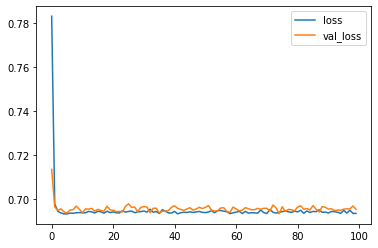

In [5]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

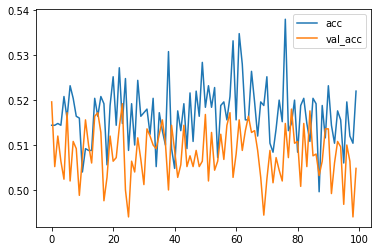

In [6]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now trying a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [9]:
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 0s 6ms/step - loss: 0.7073 - accuracy: 0.5040 - val_loss: 0.6903 - val_accuracy: 0.4720
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5436 - val_loss: 0.6754 - val_accuracy: 0.5392
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6484 - val_loss: 0.6172 - val_accuracy: 0.7284
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.7612 - val_loss: 0.5403 - val_accuracy: 0.7784
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.8044 - val_loss: 0.4623 - val_accuracy: 0.8324
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8428 - val_loss: 0.3956 - val_accuracy: 0.8644
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3593 - accuracy: 0.8812 - val_loss: 0.3458 - val_accuracy: 0.8844
Epoch 8/200
7

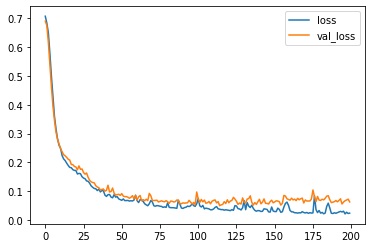

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

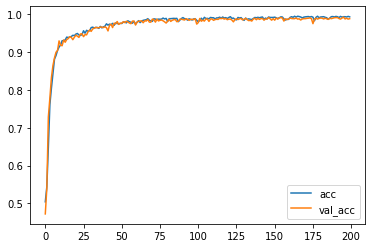

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Now long distance

In [0]:
# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [13]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7009 - accuracy: 0.4900 - val_loss: 0.6939 - val_accuracy: 0.5048
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.4944 - val_loss: 0.6935 - val_accuracy: 0.4952
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5080 - val_loss: 0.6947 - val_accuracy: 0.5060
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.5644 - val_loss: 0.6806 - val_accuracy: 0.5576
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6677 - accuracy: 0.5956 - val_loss: 0.6638 - val_accuracy: 0.5988
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6300 - val_loss: 0.6460 - val_accuracy: 0.6252
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5918 - accuracy: 0.7004 - val_loss: 0.5540 - val_accuracy: 0.7280
Epoch 8/200
7

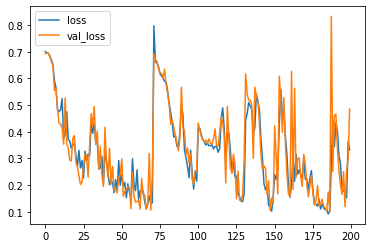

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

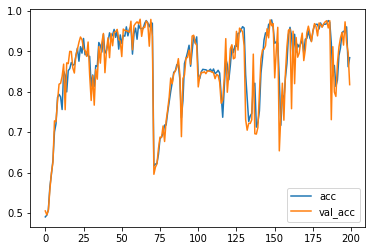

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6941 - accuracy: 0.5004 - val_loss: 0.6941 - val_accuracy: 0.5016
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5004 - val_loss: 0.6935 - val_accuracy: 0.5016
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5112 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6934 - val_accuracy: 0.4944
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4948 - val_loss: 0.6934 - val_accuracy: 0.4992
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6944 - val_accuracy: 0.5012
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5092 - val_loss: 0.6938 - val_accuracy: 0.5068
Epoch 8/200


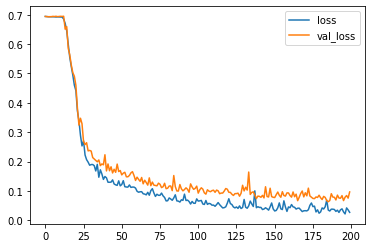

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

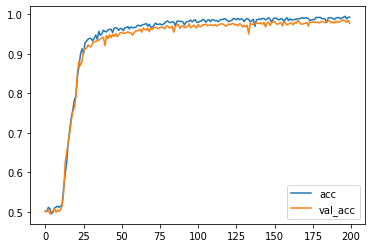

In [19]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Making harder, Sequence length(T)=20

In [0]:
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [21]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 8ms/step - loss: 0.7060 - accuracy: 0.4808 - val_loss: 0.6949 - val_accuracy: 0.4968
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6972 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.4960
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5056 - val_loss: 0.6935 - val_accuracy: 0.5132
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5060 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5056 - val_loss: 0.6945 - val_accuracy: 0.4960
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.5032 - val_loss: 0.6934 - val_accuracy: 0.5064
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5080 - val_loss: 0.6951 - val_accuracy: 0.4952
Epoch 8/200
7

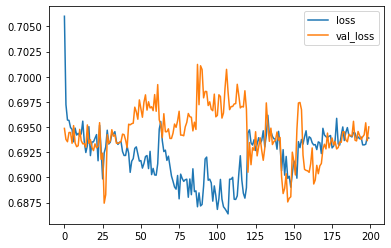

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

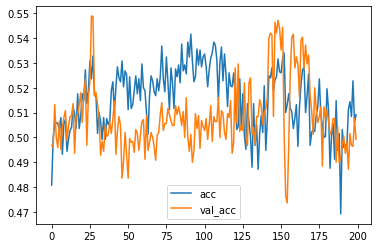

In [23]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [24]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6937 - accuracy: 0.5148 - val_loss: 0.6953 - val_accuracy: 0.4972
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6935 - accuracy: 0.5068 - val_loss: 0.6933 - val_accuracy: 0.4868
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6937 - accuracy: 0.5068 - val_loss: 0.6934 - val_accuracy: 0.5136
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.5076 - val_loss: 0.6937 - val_accuracy: 0.4892
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6936 - val_accuracy: 0.4884
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.4996 - val_loss: 0.6936 - val_accuracy: 0.4956
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6936 - val_accuracy: 0.4896
Epoch 

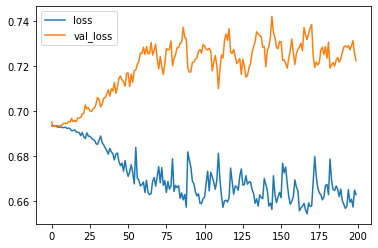

In [25]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

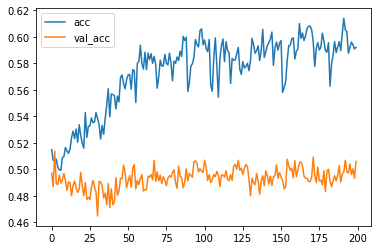

In [26]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [27]:
#Now GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6943 - accuracy: 0.5056 - val_loss: 0.6977 - val_accuracy: 0.4892
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6950 - accuracy: 0.4944 - val_loss: 0.6940 - val_accuracy: 0.4928
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6948 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6951 - accuracy: 0.4900 - val_loss: 0.6942 - val_accuracy: 0.4944
Epoch 5/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5008
Epoch 6/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6943 - accuracy: 0.4952 - val_loss: 0.6934 - val_accuracy: 0.4992
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6938 - accuracy: 0.5184 - val_loss: 0.6936 - val_accuracy: 0.4928
Epoch 

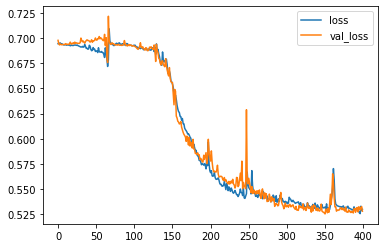

In [28]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

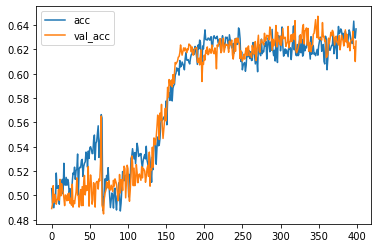

In [29]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Making harder, Sequence length(T)=30

In [0]:
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [31]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 20ms/step - loss: 0.6938 - accuracy: 0.5144 - val_loss: 0.6935 - val_accuracy: 0.4980
Epoch 2/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5136 - val_loss: 0.6937 - val_accuracy: 0.5056
Epoch 3/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6926 - accuracy: 0.5144 - val_loss: 0.6946 - val_accuracy: 0.5076
Epoch 4/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6926 - accuracy: 0.5116 - val_loss: 0.6940 - val_accuracy: 0.5068
Epoch 5/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6927 - accuracy: 0.5100 - val_loss: 0.6937 - val_accuracy: 0.5084
Epoch 6/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6923 - accuracy: 0.5196 - val_loss: 0.6948 - val_accuracy: 0.5068
Epoch 7/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6916 - accuracy: 0.5204 - val_loss: 0.6946 - val_accuracy: 0.5040
Epoch 

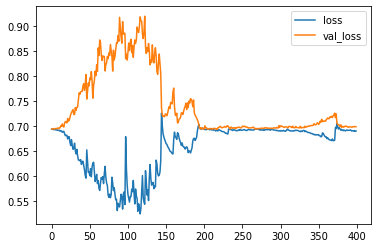

In [32]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

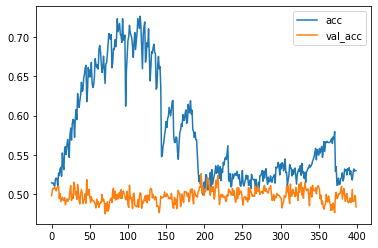

In [33]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [34]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 19ms/step - loss: 0.6940 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 2/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5052
Epoch 3/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6928 - accuracy: 0.5168 - val_loss: 0.6939 - val_accuracy: 0.5052
Epoch 4/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5140 - val_loss: 0.6936 - val_accuracy: 0.5052
Epoch 5/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5172 - val_loss: 0.6938 - val_accuracy: 0.5052
Epoch 6/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6928 - accuracy: 0.5180 - val_loss: 0.6939 - val_accuracy: 0.5052
Epoch 7/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.5144 - val_loss: 0.6935 - val_accuracy: 0.5052
Epoch 

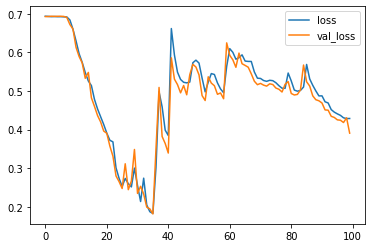

In [35]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

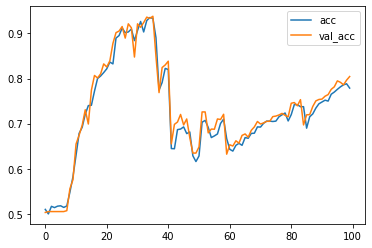

In [36]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()